<H1>Manage Librairies and IDs</H1>

In [29]:
# The code was removed by Watson Studio for sharing.

In [30]:
#Import Librairies
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import pandas as pd
import numpy as np
import random as random
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 
!pip install folium
import folium

<H1> Functions </H1>

In [31]:
#Get list of categories
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        print (categories_list)
        return categories_list[0]['name']

In [32]:
#function to get the nearby venues from Latitude, Longitude, Nb de venues max, and radius max.
def GetVenuesNearByInDataFrame(Lat_param,Lng_param,Nb_max_venues,radius):
    url ='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}&radius={}'.format(
    CLIENT_ID,CLIENT_SECRET, VERSION, Lat_param, Lng_param ,Nb_max_venues ,radius)
    results = requests.get(url).json()
    print(results)
    venues = results['response']['groups'][0]['items'] 
    nearby_venues = pd.json_normalize(venues) # flatten JSON
    # filter columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.city','venue.location.postalCode']
    nearby_venues =nearby_venues.loc[:, filtered_columns]
    # filter the category for each row
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
    # clean columns
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
    nearby_venues.head()
    
    return (nearby_venues )

<H1>Get the data</H1>

In [33]:
#Get the data for Montmatre, a parisian neighborhood
MontmartreLat=48.8857636427167
MontmartreLng=2.3349730916262725
DataFromParis = GetVenuesNearByInDataFrame(MontmartreLat,MontmartreLng,111,300)

{'meta': {'code': 200, 'requestId': '5fa5b1540bf98854155f9aac'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Clignancourt', 'headerFullLocation': 'Clignancourt, Paris', 'headerLocationGranularity': 'neighborhood', 'totalResults': 70, 'suggestedBounds': {'ne': {'lat': 48.8884636454167, 'lng': 2.3390715030046434}, 'sw': {'lat': 48.883063640016694, 'lng': 2.3308746802479017}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4d541304d4a6721e9b5691ac', 'name': 'Boulangerie Alexine', 'location': {'address': '40 rue Lepic', 'lat': 48.88614133131494, 'lng': 2.3344767093658447, 'labeledLatLngs': [{'label': 'display', 'lat': 48.88614133131494, 'lng': 2.3344767093658447}], 'distance': 55, 'postalCode': '75018', 'cc': 'FR', 'city': 'Pa

In [38]:
DataFromParis.shape

(70, 6)

In [39]:
#The search is splitted in 4 to over come the 100 limit from Foursquare
SydneyLat= -33.83083506008578
SydneyLng= 151.2199836084402
DataFromSydney1 = GetVenuesNearByInDataFrame(SydneyLat,SydneyLng,100,1000)
SydneyLat= -33.893440981237674
SydneyLng=  151.25214776362452
DataFromSydney2 = GetVenuesNearByInDataFrame(SydneyLat,SydneyLng,100,1000)
SydneyLat= -33.81104084851121 
SydneyLng= 151.2572976048045
DataFromSydney3 = GetVenuesNearByInDataFrame(SydneyLat,SydneyLng,100,1000)
SydneyLat= -33.89287101129953
SydneyLng=  151.20373925653246
DataFromSydney4 = GetVenuesNearByInDataFrame(SydneyLat,SydneyLng,100,1000)


{'meta': {'code': 200, 'requestId': '5fa5b24cafd98854dd1664bf'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Neutral Bay', 'headerFullLocation': 'Neutral Bay, Sydney', 'headerLocationGranularity': 'neighborhood', 'totalResults': 86, 'suggestedBounds': {'ne': {'lat': -33.82183505108577, 'lng': 151.23079782240407}, 'sw': {'lat': -33.839835069085794, 'lng': 151.20916939447633}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4cd8712815d8b60c14fc650e', 'name': 'Essence Coffee', 'location': {'address': 'Shop 3, 148 Wycombe Rd', 'lat': -33.83190296551829, 'lng': 151.22235012479607, 'labeledLatLngs': [{'label': 'display', 'lat': -33.83190296551829, 'lng': 151.22235012479607}], 'distance': 249, 'postalCode': '2089', 'cc': 'AU', 'c

In [64]:
#Concatenate the venus from the 2 cities
df_venues=pd.concat ([DataFromParis,DataFromSydney1,DataFromSydney2,DataFromSydney3,DataFromSydney4]).reset_index()
df_venues.drop(['index'],axis=1,inplace =True)
df_venues.head()

,name,categories,lat,lng,city,postalCode
0,Boulangerie Alexine,Bakery,48.886141,2.334477,Paris,75018
1,Guilo Guilo,Japanese Restaurant,48.885942,2.337048,Paris,75018
2,Terrass'' Hotel,Hotel,48.886532,2.333159,Paris,75018
3,Al Caratello,Italian Restaurant,48.885248,2.336002,Paris,75018
4,Le Grenier à Pain,Bakery,48.885283,2.336718,Paris,75018


<H1>Prepare the dataset</H1>

In [65]:
#turn the categorical data to a numeric (Hot encoding)
Data_hot = pd.get_dummies (df_venues[['categories']],prefix='',prefix_sep='')
Data_hot

# add neighborhood column back to dataframe
Data_hot['name'] = df_venues['name'] 
Data_hot['lat'] = df_venues['lat'] 
Data_hot['lng'] = df_venues['lng'] 
Data_hot['city'] = df_venues['city'] 
Data_hot['postalCode'] = df_venues['postalCode'] 


#move the fixed columns to the font.
fixed_columns = [Data_hot.columns[-1]] + list(Data_hot.columns[:-1])
Data_hot = Data_hot[fixed_columns]
fixed_columns = [Data_hot.columns[-1]] + list(Data_hot.columns[:-1])
Data_hot = Data_hot[fixed_columns]
fixed_columns = [Data_hot.columns[-1]] + list(Data_hot.columns[:-1])
Data_hot = Data_hot[fixed_columns]
fixed_columns = [Data_hot.columns[-1]] + list(Data_hot.columns[:-1])
Data_hot = Data_hot[fixed_columns]
fixed_columns = [Data_hot.columns[-1]] + list(Data_hot.columns[:-1])
Data_hot = Data_hot[fixed_columns]
Data_hot.head()

,name,lat,lng,city,postalCode,Antique Shop,Argentinian Restaurant,Art Gallery,Australian Restaurant,BBQ Joint,...,Tennis Court,Thai Restaurant,Theater,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,Boulangerie Alexine,48.886141,2.334477,Paris,75018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guilo Guilo,48.885942,2.337048,Paris,75018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Terrass'' Hotel,48.886532,2.333159,Paris,75018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Al Caratello,48.885248,2.336002,Paris,75018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Le Grenier à Pain,48.885283,2.336718,Paris,75018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
#Group the data by PostalCode
city_grouped = Data_hot.groupby(['postalCode']).mean().reset_index()
city_grouped.head()

,postalCode,lat,lng,Antique Shop,Argentinian Restaurant,Art Gallery,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Tennis Court,Thai Restaurant,Theater,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,2008,-33.886771,151.200181,0.0,0.00,0.062500,0.062500,0.0625,0.0,0.062500,...,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.0625,0.0,0.000000
1,2010,-33.888539,151.209600,0.0,0.04,0.000000,0.000000,0.0400,0.0,0.000000,...,0.0,0.04,0.04,0.04,0.0,0.0,0.000000,0.0000,0.0,0.000000
2,2014,-33.891864,151.200566,0.0,0.00,0.000000,0.000000,0.0000,0.0,0.000000,...,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.0000,0.0,0.000000
3,2015,-33.897807,151.198286,0.0,0.00,0.000000,0.000000,0.0000,0.0,0.000000,...,0.0,0.25,0.00,0.00,0.0,0.0,0.000000,0.0000,0.0,0.000000
4,2016,-33.892259,151.203755,0.0,0.00,0.026316,0.026316,0.0000,0.0,0.052632,...,0.0,0.00,0.00,0.00,0.0,0.0,0.026316,0.0000,0.0,0.026316


<H1>Apply K-means to cluster the Areas according their most common venues</H1>

In [165]:
X = city_grouped.values[:,4:]

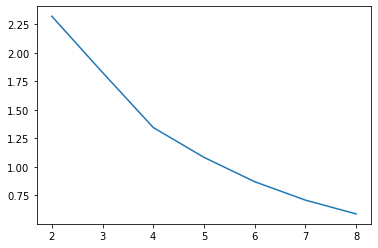

In [208]:
#finding the best K with the elbow Method

K=[2,3,4,5,6,7,8]
loss=[]
for i in K :
    k_means = KMeans(init="k-means++", n_clusters=i, n_init=21)
    k_means.fit(X)
    loss.append(k_means.inertia_)
plt.plot(K,loss)

In [210]:
k=4
k_means.fit(X)
labels = k_means.labels_
k_means

KMeans(n_init=21)

In [211]:
labels
city_grouped["Label"] = labels
city_grouped.head(100)

,postalCode,lat,lng,Antique Shop,Argentinian Restaurant,Art Gallery,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Theater,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Label,color
0,2008,-33.886771,151.200181,0.000000,0.00,0.062500,0.062500,0.062500,0.0,0.062500,...,0.000000,0.00,0.000000,0.00,0.000000,0.062500,0.000000,0.000000,3,#ff0060
1,2010,-33.888539,151.209600,0.000000,0.04,0.000000,0.000000,0.040000,0.0,0.000000,...,0.040000,0.04,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,3,#ff0060
2,2014,-33.891864,151.200566,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,1,#6B5B95
3,2015,-33.897807,151.198286,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,7,#ff0060
4,2016,-33.892259,151.203755,0.000000,0.00,0.026316,0.026316,0.000000,0.0,0.052632,...,0.000000,0.00,0.000000,0.00,0.026316,0.000000,0.000000,0.026316,3,#ff0060
5,2017,-33.897245,151.205447,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.125000,...,0.000000,0.00,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,3,#ff0060
6,2022,-33.892258,151.249545,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.020833,...,0.000000,0.00,0.020833,0.00,0.000000,0.000000,0.000000,0.000000,3,#000000
7,2023,-33.886422,151.256072,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,5,#ff8080
8,2024,-33.899519,151.253906,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0,#000000
9,2026,-33.893736,151.261297,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.111111,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,3,#ff0060


In [212]:
#Get the color for each cluster.
city_grouped.loc[city_grouped['Label'] == 0, 'color'] = '#6B5B95'
city_grouped.loc[city_grouped['Label'] == 1, 'color'] = '#ff0060'
city_grouped.loc[city_grouped['Label'] == 2, 'color'] = '#ff8090'
city_grouped.loc[city_grouped['Label'] == 3, 'color'] = '#000000'
city_grouped.loc[city_grouped['Label'] == 4, 'color'] = '#FF6F61' 
city_grouped.loc[city_grouped['Label'] == 5, 'color'] = '#ff8080' 
city_grouped.loc[city_grouped['Label'] == 6, 'color'] = '#92A8D1' 
city_grouped.loc[city_grouped['Label'] == 7, 'color'] = '#B565A7' 
city_grouped.loc[city_grouped['Label'] == 8, 'color'] = '#009B77' 
#city_grouped.loc[city_grouped['Label'] == 9, 'color'] = '#DD4124' 
#city_grouped.loc[city_grouped['Label'] == 10, 'color'] = '#45B8AC' 
city_grouped

,postalCode,lat,lng,Antique Shop,Argentinian Restaurant,Art Gallery,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Theater,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Label,color
0,2008,-33.886771,151.200181,0.000000,0.00,0.062500,0.062500,0.062500,0.0,0.062500,...,0.000000,0.00,0.000000,0.00,0.000000,0.062500,0.000000,0.000000,3,#000000
1,2010,-33.888539,151.209600,0.000000,0.04,0.000000,0.000000,0.040000,0.0,0.000000,...,0.040000,0.04,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,3,#000000
2,2014,-33.891864,151.200566,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,1,#ff0060
3,2015,-33.897807,151.198286,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,7,#B565A7
4,2016,-33.892259,151.203755,0.000000,0.00,0.026316,0.026316,0.000000,0.0,0.052632,...,0.000000,0.00,0.000000,0.00,0.026316,0.000000,0.000000,0.026316,3,#000000
5,2017,-33.897245,151.205447,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.125000,...,0.000000,0.00,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,3,#000000
6,2022,-33.892258,151.249545,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.020833,...,0.000000,0.00,0.020833,0.00,0.000000,0.000000,0.000000,0.000000,3,#000000
7,2023,-33.886422,151.256072,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,5,#ff8080
8,2024,-33.899519,151.253906,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0,#6B5B95
9,2026,-33.893736,151.261297,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.111111,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,3,#000000


In [213]:
#Get the Label/Cluster number from paris. It will be used to filter Sydney dataset
MontmatreCluster = city_grouped.loc[city_grouped['postalCode'] == '75018']['Label'].values
MontmatreCluster

array([3], dtype=int32)

<H1>Plug the data on a graph.</h1>

<h3>Get the data for Sydney like Paris areas.
Generate 1 maps for all Sydney areas, 1 map for only the parisian like areas.
For parisian like areas, display all the venues splited by categories</h3>

In [214]:
#Get the Sydney Neighborhood similar to Montmatre  (Sydney postal codes are 4 digits. Paris = 5 digits)
SydneyAreasLikeParis = city_grouped.loc[(city_grouped['postalCode'].astype('int64') <=10000) & (city_grouped['Label'] ==MontmatreCluster[0])  ]
AllSydney = city_grouped.loc[(city_grouped['postalCode'].astype('int64') <=10000) ]

SydneyAreasLikeParis.head()

,postalCode,lat,lng,Antique Shop,Argentinian Restaurant,Art Gallery,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Theater,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Label,color
0,2008,-33.886771,151.200181,0.0,0.00,0.062500,0.062500,0.0625,0.0,0.062500,...,0.00,0.00,0.000000,0.00,0.000000,0.0625,0.0,0.000000,3,#000000
1,2010,-33.888539,151.209600,0.0,0.04,0.000000,0.000000,0.0400,0.0,0.000000,...,0.04,0.04,0.000000,0.00,0.000000,0.0000,0.0,0.000000,3,#000000
4,2016,-33.892259,151.203755,0.0,0.00,0.026316,0.026316,0.0000,0.0,0.052632,...,0.00,0.00,0.000000,0.00,0.026316,0.0000,0.0,0.026316,3,#000000
5,2017,-33.897245,151.205447,0.0,0.00,0.000000,0.000000,0.0000,0.0,0.125000,...,0.00,0.00,0.000000,0.25,0.000000,0.0000,0.0,0.000000,3,#000000
6,2022,-33.892258,151.249545,0.0,0.00,0.000000,0.000000,0.0000,0.0,0.020833,...,0.00,0.00,0.020833,0.00,0.000000,0.0000,0.0,0.000000,3,#000000


<h2>Map for all Sydney areas</h2>

In [215]:
#Generate the map for all Sydney
sydney_area_map = folium.Map(location=[ -33.87285279645642,151.2085876435312],zoom_start =12)
area = folium.map.FeatureGroup()
for lat, lng,color ,lab in zip(AllSydney.lat, AllSydney.lng,AllSydney.color,AllSydney.Label):
    area.add_child(
        folium.CircleMarker(
            [lat, lng],
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.6,     
            tooltip='Postal Code = '+pc+ ' - cluster = ' + str(lab)
        )
    )
sydney_area_map.add_child(area)
# display map
sydney_area_map

<h2>Map for Sydney like Montmatre areas (same cluster)</h2>

In [216]:
#Generate the map for Sydney neighborhood like the parisian one
sydney_like_area_map = folium.Map(location=[ -33.93285279645642,151.2085876435312],zoom_start =12)
area = folium.map.FeatureGroup()
for lat, lng,color in zip(SydneyAreasLikeParis.lat, SydneyAreasLikeParis.lng,SydneyAreasLikeParis.color):
    area.add_child(
        folium.CircleMarker(
            [lat, lng],
            color=color,
            fill=True,
            fill_color='color',
            fill_opacity=0.6,
            tooltip=name +' - '+cat
        )
    )
sydney_like_area_map.add_child(area)
# display map
sydney_like_area_map

<H1>Display all the venues for the Sydney areas like Montmatre</H1>

In [217]:
#Merge the venues and the Areas dataframe in order to be able to filter the venues based on the postal code
VenuesSydney= SydneyAreasLikeParis[['postalCode']].merge(df_venues, how='left', left_on='postalCode', right_on='postalCode')

<H3>Get randomly a color 1 color for each categorie </h3>

In [218]:
#Get the unique list of the categories
#countCat = VenuesSydney['categories'].nunique()
List_Categories=VenuesSydney.categories.unique()
List_Categories=pd.DataFrame(List_Categories,columns=['categories'])

#Get random color for each venue categorie
List_Categories['color']=0
for cat in List_Categories['categories'] :
    r = lambda: random.randint(0,255)
    List_Categories.loc[List_Categories['categories'] == cat, ['color']] = ('#%02X%02X%02X' % (r(),r(),r()))
List_Categories.head()

,categories,color
0,Bakery,#A764F8
1,BBQ Joint,#A2A559
2,Art Gallery,#8DF2B8
3,Australian Restaurant,#570859
4,Wine Bar,#923DA7


In [219]:
#Merge venues and color mapping - Get the color in the dataframe
VenuesSydney= VenuesSydney.merge(List_Categories, how='left', left_on='categories', right_on='categories')
VenuesSydney.head()

,postalCode,name,categories,lat,lng,city,color
0,2008,Brickfields,Bakery,-33.888615,151.199790,Chippendale,#A764F8
1,2008,LP's Quality Meats,BBQ Joint,-33.887367,151.200788,Chippendale,#A2A559
2,2008,White Rabbit Gallery,Art Gallery,-33.886466,151.200146,Chippendale,#8DF2B8
3,2008,Ester Restaurant,Australian Restaurant,-33.887608,151.200818,Sydney,#570859
4,2008,Handpicked Cellar Door,Wine Bar,-33.885712,151.201842,Chippendale,#923DA7


<h2>Map for Sydney like Montmatre areas</h2>

In [220]:
sydney_venues_map = folium.Map(location=[-33.87083506008578, 151.2199836084402],zoom_start =13)
venues = folium.map.FeatureGroup()

for lat, lng,name,color,cat in zip(VenuesSydney.lat, VenuesSydney.lng,VenuesSydney.name,VenuesSydney.color,VenuesSydney.categories):
    venues.add_child(
        folium.CircleMarker(
            [lat, lng],
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            tooltip=name +' - '+cat
        )
    )
sydney_venues_map.add_child(venues)
# display map
sydney_venues_map